In [2]:
import random
import math
import json
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext blackcellmagic

In [7]:
def res_df_from_json(json_file):
    rdf = pd.DataFrame(columns=["id", "role", "timestamp"])
    adf = pd.DataFrame()
    data = json.load(open(json_file, "r"))["responses"]
    for rater_id in data:
        role = data[rater_id]["role"]
        timestamp = data[rater_id]["timestamp"]
        answers = data[rater_id]["answers"]
        for k in answers:
            answers[k] = 1 if answers[k] == "yes" else 0
        row = {"id": rater_id,"role": role, "timestamp": timestamp}
        rdf = rdf.append(row, ignore_index=True)
        adf = adf.append(answers, ignore_index=True)
    return rdf, adf


RESPONSE_JSON = "resumesai-8d1b3-export.json"
RESPONSE_CSV = "raters.csv"
ANSWER_CSV = "answers.csv"
rdf, adf = res_df_from_json(RESPONSE_JSON)
rdf.to_csv(RESPONSE_CSV)
adf.to_csv(ANSWER_CSV)

In [8]:
rdf

,id,role,timestamp
0,-LPJqxk_oAUkYS6wbftT,recruiter,1540095728249
1,-LPJrbyPHKgFRNi6PHe1,recruiter,1540095901514
2,-LPJv208iX5I2F-rQEYP,hiringmanager,1540096793596
3,-LPJzeWj7bMQ7NvA5inH,engineer,1540098009097
4,-LPK2vNZpA3l2W3Ghxg3,engineer,1540099126722
5,-LPKP13CchCwAK2Jsbr7,engineer,1540104915947


In [9]:
adf

,j050601_m,j050701_m,j050702_m,j052201_m,j052501_m,j052601_m,j052602_m,j053801_m,j053802_m,s051542_m,...,v051601_m,v051701_m,v052401_m,v053001_m,v053201_m,v054501_m,v054601_f,v064101_f,v064201_f,v090201_m
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [10]:
pd.read_csv("raters.csv", index_col=0)

,id,role,timestamp
0,-LPJqxk_oAUkYS6wbftT,recruiter,1540095728249
1,-LPJrbyPHKgFRNi6PHe1,recruiter,1540095901514
2,-LPJv208iX5I2F-rQEYP,hiringmanager,1540096793596
3,-LPJzeWj7bMQ7NvA5inH,engineer,1540098009097
4,-LPK2vNZpA3l2W3Ghxg3,engineer,1540099126722
5,-LPKP13CchCwAK2Jsbr7,engineer,1540104915947


In [11]:
pd.read_csv("answers.csv", index_col=0)

,j050601_m,j050701_m,j050702_m,j052201_m,j052501_m,j052601_m,j052602_m,j053801_m,j053802_m,s051542_m,...,v051601_m,v051701_m,v052401_m,v053001_m,v053201_m,v054501_m,v054601_f,v064101_f,v064201_f,v090201_m
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [77]:
M = len(adf)
N = len(adf.T)
rdf["acceptance_rate"] = [(adf[i:(i + 1)].sum(axis=1)[i]) / N for i in range(M)]
rdf

,id,role,timestamp,acceptance_rate
0,-LPJqxk_oAUkYS6wbftT,recruiter,1540095728249,0.36
1,-LPJrbyPHKgFRNi6PHe1,recruiter,1540095901514,0.32
2,-LPJv208iX5I2F-rQEYP,hiringmanager,1540096793596,0.52
3,-LPJzeWj7bMQ7NvA5inH,engineer,1540098009097,0.64
4,-LPK2vNZpA3l2W3Ghxg3,engineer,1540099126722,0.36
5,-LPKP13CchCwAK2Jsbr7,engineer,1540104915947,0.64


In [80]:
sdf = adf.T
sdf["selection_rate"] = [sdf[i:(i + 1)].sum(axis=1)[0] / M for i in range(N)]
sdf

,0,1,2,3,4,5,selection_rate
j050601_m,0.0,1.0,1.0,1.0,1.0,1.0,0.833333
j050701_m,0.0,1.0,1.0,1.0,0.0,1.0,0.666667
j050702_m,1.0,1.0,0.0,1.0,1.0,1.0,0.833333
j052201_m,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
j052501_m,0.0,0.0,1.0,1.0,1.0,1.0,0.666667
j052601_m,1.0,1.0,0.0,1.0,0.0,1.0,0.666667
j052602_m,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
j053801_m,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
j053802_m,0.0,0.0,0.0,0.0,0.0,1.0,0.166667
s051542_m,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


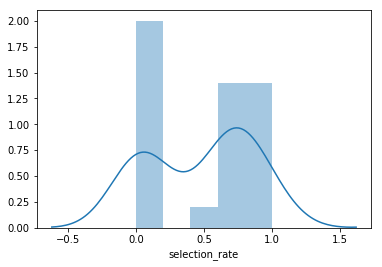

In [83]:
sns.distplot(sdf["selection_rate"], bins=(M-1))